# Problem Statement:
**Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)**

In [1]:
#!pip install spacy
#!python -m spacy download en
#!pip install nltk
#!pip install wordcloud

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models
import re
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [3]:
data = pd.read_csv("Elon_musk.csv", encoding='latin1', error_bad_lines = False)
data.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [4]:
# remove both the leading and the trailing characters
text_ = [entry.strip() for entry in data.Text]
# removes empty strings, because they are considered in Python as False
text_ = [x for x in text_ if x] 
# Joining the list into one string/text
text = ' '.join(text_)
text = re.sub("[0-9" "]+"," ",text).lower()
text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text).lower()
text = re.sub("[^A-Za-z" "]+"," ",text).lower()
text

' kunalb i m an alien id aa carmack ray tracing on cyberpunk with hdr is next level have you tried it joerogan spotify great interview gtera doge is underestimated teslacn congratulations tesla china for amazing execution last year now on to the next for even more happy new year of the ox https t co wfkmyu oj frodo was the underdoge all thought he would fail himself most of all https t co zgxjfdzzrm owensparks flcnhvy anonyx haha thanks flcnhvy anonyx indeed tweets definitely do not represent real world time allocation the most entertaining outcome is the most likely givedirectly just sent some just agree to do clubhouse with kanyewest https t co rwe uhsts geoffkeighley unrealengine it s getting real bought some dogecoin for lil x so he can be a toddler hodler joshmanmode he definitely has issues but the sentencing seems a bit high freewalletorg thanks for fixing freewalletorg please unlock my account astrojordy u f u f this is true power haha https t co fc uhqsd o freewalletorg any cr

In [5]:
#Punctuation
no_punc_text = text.translate(str.maketrans("\x92", "'", string.punctuation)) 
no_punc_text

' kunalb i m an alien id aa carmack ray tracing on cyberpunk with hdr is next level have you tried it joerogan spotify great interview gtera doge is underestimated teslacn congratulations tesla china for amazing execution last year now on to the next for even more happy new year of the ox https t co wfkmyu oj frodo was the underdoge all thought he would fail himself most of all https t co zgxjfdzzrm owensparks flcnhvy anonyx haha thanks flcnhvy anonyx indeed tweets definitely do not represent real world time allocation the most entertaining outcome is the most likely givedirectly just sent some just agree to do clubhouse with kanyewest https t co rwe uhsts geoffkeighley unrealengine it s getting real bought some dogecoin for lil x so he can be a toddler hodler joshmanmode he definitely has issues but the sentencing seems a bit high freewalletorg thanks for fixing freewalletorg please unlock my account astrojordy u f u f this is true power haha https t co fc uhqsd o freewalletorg any cr

In [6]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Renu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Renu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
#Tokenization
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:40])

['kunalb', 'i', 'm', 'an', 'alien', 'id', 'aa', 'carmack', 'ray', 'tracing', 'on', 'cyberpunk', 'with', 'hdr', 'is', 'next', 'level', 'have', 'you', 'tried', 'it', 'joerogan', 'spotify', 'great', 'interview', 'gtera', 'doge', 'is', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'for', 'amazing', 'execution', 'last', 'year', 'now', 'on']


In [8]:
#Remove stopwords
from nltk.corpus import stopwords
my_stopwords = pd.read_csv("stop.txt")
my_stopwords

,a
0,a's
1,able
2,about
3,above
4,according
...,...
565,yours
566,yourself
567,yourselves
568,z


In [10]:
no_stop_tokens = [word for word in text_tokens if not word in my_stopwords]
print(no_stop_tokens[0:25])

['kunalb', 'i', 'm', 'an', 'alien', 'id', 'aa', 'carmack', 'ray', 'tracing', 'on', 'cyberpunk', 'with', 'hdr', 'is', 'next', 'level', 'have', 'you', 'tried', 'it', 'joerogan', 'spotify', 'great', 'interview']


In [11]:
#Lowercase the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:25])

['kunalb', 'i', 'm', 'an', 'alien', 'id', 'aa', 'carmack', 'ray', 'tracing', 'on', 'cyberpunk', 'with', 'hdr', 'is', 'next', 'level', 'have', 'you', 'tried', 'it', 'joerogan', 'spotify', 'great', 'interview']


In [12]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:30])

['kunalb', 'i', 'm', 'an', 'alien', 'id', 'aa', 'carmack', 'ray', 'trace', 'on', 'cyberpunk', 'with', 'hdr', 'is', 'next', 'level', 'have', 'you', 'tri', 'it', 'joerogan', 'spotifi', 'great', 'interview', 'gtera', 'doge', 'is', 'underestim', 'teslacn']


In [13]:
# NLP english language model of spacy library
nlp = spacy.load('en_core_web_sm')
doc = nlp(' '.join(lower_words))
print(doc[0:40])

kunalb i m an alien id aa carmack ray tracing on cyberpunk with hdr is next level have you tried it joerogan spotify great interview gtera doge is underestimated teslacn congratulations tesla china for amazing execution last year now


In [14]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['kunalb', 'I', 'm', 'an', 'alien', 'i', 'd', 'aa', 'carmack', 'ray', 'trace', 'on', 'cyberpunk', 'with', 'hdr', 'be', 'next', 'level', 'have', 'you', 'try', 'it', 'joerogan', 'spotify', 'great']


# Feature Extraction

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)
pd.DataFrame.from_records([vectorizer.vocabulary_])

,kunalb,an,alien,aa,carmack,ray,trace,on,cyberpunk,with,...,dire,priority,surreal,propaganda,social,wjrzibkh,click,samwise,gamgee,altho
0,2297,165,129,0,606,3428,4384,2943,929,4795,...,1060,3271,4113,3303,3888,4800,729,3667,1621,144


In [16]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=False).head(10)

,0
zzcool,5009
zz,5008
zynsxisp,5007
zyj,5006
zyf,5005
zxd,5004
zwiebelbach,5003
zvm,5002
zugaquvpy,5001
zubinanary,5000


In [17]:
print(vectorizer.vocabulary_)

{'kunalb': 2297, 'an': 165, 'alien': 129, 'aa': 0, 'carmack': 606, 'ray': 3428, 'trace': 4384, 'on': 2943, 'cyberpunk': 929, 'with': 4795, 'hdr': 1806, 'be': 380, 'next': 2805, 'level': 2371, 'have': 1794, 'you': 4936, 'try': 4417, 'it': 2108, 'joerogan': 2181, 'spotify': 3965, 'great': 1727, 'interview': 2078, 'gtera': 1744, 'doge': 1104, 'underestimate': 4498, 'teslacn': 4207, 'congratulation': 815, 'tesla': 4203, 'china': 689, 'for': 1528, 'amazing': 154, 'execution': 1366, 'last': 2327, 'year': 4915, 'now': 2858, 'to': 4341, 'the': 4257, 'even': 1335, 'more': 2700, 'happy': 1780, 'new': 2802, 'of': 2911, 'ox': 3032, 'https': 1916, 'co': 744, 'wfkmyu': 4734, 'oj': 2931, 'frodo': 1571, 'underdoge': 4497, 'all': 131, 'think': 4289, 'he': 1808, 'would': 4822, 'fail': 1406, 'himself': 1855, 'most': 2707, 'zgxjfdzzrm': 4976, 'owensparks': 3026, 'flcnhvy': 1504, 'anonyx': 186, 'haha': 1765, 'thanks': 4250, 'indeed': 2014, 'tweet': 4438, 'definitely': 991, 'do': 1097, 'not': 2851, 'represe

In [18]:
print(vectorizer.get_feature_names_out()[50:100])
print(X.toarray())
print(X.toarray().shape)

['adagio' 'adajy' 'adamblitzer' 'adamhoov' 'adamkiotz' 'adamklotz' 'add'
 'addicted' 'additive' 'address' 'adlanbogatyryov' 'administer' 'adojs'
 'adolfo' 'adri' 'adult' 'aduotl' 'advanc' 'advance' 'advanced'
 'advantage' 'adventure' 'advertising' 'advice' 'advise' 'ae' 'aero' 'af'
 'afb' 'affair' 'affect' 'affordable' 'afloathickory' 'africa' 'afru'
 'afshari' 'after' 'afternoon' 'ag' 'again' 'age' 'agje' 'ago' 'agokwqpv'
 'agony' 'agree' 'ah' 'ahead' 'ahem' 'aholstein']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(24555, 5010)


In [19]:
cv_df = pd.DataFrame(X.toarray(),columns=list(vectorizer.get_feature_names_out()))
cv_df

,aa,aayypcpp,ab,aber,able,abo,aboard,abort,about,above,...,zubinanary,zugaquvpy,zvm,zwiebelbach,zxd,zyf,zyj,zynsxisp,zz,zzcool
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24550,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24551,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24552,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24553,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Including Bigrams and Trigrams**

In [20]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',
                                         ngram_range=(1,4),
                                         max_features = 100)

bow_matrix_ngram = vectorizer_ngram_range.fit_transform(text_)
bow_matrix_ngram

<1999x100 sparse matrix of type '<class 'numpy.int64'>'
	with 9618 stored elements in Compressed Sparse Row format>

In [21]:
print(bow_matrix_ngram.toarray()[50:75])

[[0 0 0 ... 0 0 0]
 [2 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


**TFidf vectorizer**

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(ngram_range=(1,2), max_features = 40)
text_tf = tf.fit_transform(lemmas)
print(tf.get_feature_names_out())
print(text_tf.toarray())


['amp' 'and' 'as' 'at' 'be' 'but' 'co' 'do' 'erdayastronaut' 'flcnhvy'
 'for' 'from' 'good' 'great' 'have' 'https' 'in' 'it' 'just' 'make' 'no'
 'not' 'of' 'on' 'ppathole' 'rt' 'so' 'spacex' 'tesla' 'teslaownerssv'
 'that' 'the' 'this' 'to' 'we' 'wholemarsblog' 'will' 'with' 'yes' 'you']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [23]:
dense = text_tf.todense()
denselist = dense.tolist()
df =pd.DataFrame(denselist, columns=tf.get_feature_names_out())
df

,amp,and,as,at,be,but,co,do,erdayastronaut,flcnhvy,...,that,the,this,to,we,wholemarsblog,will,with,yes,you
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24551,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24553,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Generate wordcloud**

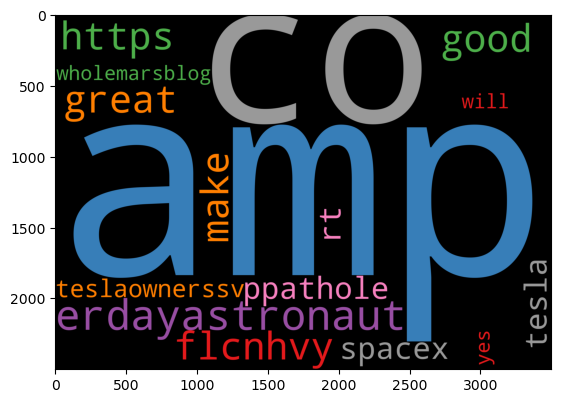

In [24]:
# Generate wordcloud
word_list = ' '.join(df)
wordcloud = WordCloud(width = 3500, 
                      height = 2500,
                      background_color='black',
                      max_words=250,
                      colormap='Set1').generate(word_list)
# Plot
plt.imshow(wordcloud)

# Sentiment Analysis

In [25]:
text2 = data.Text
text2 = [x.strip() for x in text2] # remove both the leading and the trailing characters
text2 = ' '.join(text2)
text2 = re.sub(r'http\S+', '', text2) #remove hyperlink
text2 = re.sub("[0-9" "]+"," ",text2) #remove numbers
text2 = re.sub("[^A-Za-z." "]+"," ",text2) #remove special character
text2

' kunalb I m an alien ID AA Carmack Ray tracing on Cyberpunk with HDR is next level. Have you tried it joerogan Spotify Great interview gtera Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more Happy New Year of the Ox Frodo was the underdoge All thought he would fail Himself most of all. OwenSparks flcnhvy anonyx Haha thanks flcnhvy anonyx Indeed Tweets definitely do not represent real world time allocation. The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest geoffkeighley UnrealEngine It s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U F U F This is true power haha freewalletorg Any crypto wallet that won t give you your private keys should be avoided at all costs f

In [26]:
from nltk import tokenize

sentences = tokenize.sent_tokenize(text2)
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,kunalb I m an alien ID AA Carmack Ray tracing...
1,Have you tried it joerogan Spotify Great inter...
2,Now on to the next for even more Happy New Yea...
3,OwenSparks flcnhvy anonyx Haha thanks flcnhvy ...
4,The most entertaining outcome is the most like...
...,...
645,burakaydik True Wow IHOP amp GitHub are close ...
646,This is both great amp terrifying.
647,Everything we ve ever sensed or thought has be...
648,It may never pay out as the stock can t b Ihea...


In [27]:
#list of positive words
senti_pw = pd.read_csv('positive-words.txt', 
                   error_bad_lines=False, 
                   sep = ",", 
                   encoding = 'latin-1',
                   header = None)
senti_pw.drop(senti_pw.index[0:26], axis = 0, inplace = True)
senti_pw.columns = ["word"]
senti_pw['score'] = 1
senti_pw

b'Skipping line 10: expected 1 fields, saw 2\nSkipping line 14: expected 1 fields, saw 5\nSkipping line 15: expected 1 fields, saw 3\nSkipping line 16: expected 1 fields, saw 2\nSkipping line 18: expected 1 fields, saw 3\nSkipping line 19: expected 1 fields, saw 3\nSkipping line 27: expected 1 fields, saw 3\nSkipping line 28: expected 1 fields, saw 2\n'


,word,score
26,a+,1
27,abound,1
28,abounds,1
29,abundance,1
30,abundant,1
...,...,...
2027,youthful,1
2028,zeal,1
2029,zenith,1
2030,zest,1


In [28]:
#list of negative words
senti_ng = pd.read_csv('negative-words.txt', 
                   error_bad_lines=False, 
                   sep = ",", 
                   encoding = 'latin-1',
                   header = None)
senti_ng.drop(senti_ng.index[0:26], axis = 0, inplace = True)
senti_ng.columns = ["word"]
senti_ng['score'] = -1
senti_ng

b'Skipping line 10: expected 1 fields, saw 2\nSkipping line 14: expected 1 fields, saw 5\nSkipping line 15: expected 1 fields, saw 3\nSkipping line 16: expected 1 fields, saw 2\nSkipping line 18: expected 1 fields, saw 3\nSkipping line 19: expected 1 fields, saw 3\nSkipping line 27: expected 1 fields, saw 3\nSkipping line 28: expected 1 fields, saw 2\n'


,word,score
26,2-faced,-1
27,2-faces,-1
28,abnormal,-1
29,abolish,-1
30,abominable,-1
...,...,...
4804,zaps,-1
4805,zealot,-1
4806,zealous,-1
4807,zealously,-1


In [29]:
affinity_score = pd.concat([senti_pw, senti_ng], axis = 0)
affinity_scores = affinity_score.set_index('word')['score'].to_dict()
affinity_scores

{'a+': 1,
 'abound': 1,
 'abounds': 1,
 'abundance': 1,
 'abundant': 1,
 'accessable': 1,
 'accessible': 1,
 'acclaim': 1,
 'acclaimed': 1,
 'acclamation': 1,
 'accolade': 1,
 'accolades': 1,
 'accommodative': 1,
 'accomodative': 1,
 'accomplish': 1,
 'accomplished': 1,
 'accomplishment': 1,
 'accomplishments': 1,
 'accurate': 1,
 'accurately': 1,
 'achievable': 1,
 'achievement': 1,
 'achievements': 1,
 'achievible': 1,
 'acumen': 1,
 'adaptable': 1,
 'adaptive': 1,
 'adequate': 1,
 'adjustable': 1,
 'admirable': 1,
 'admirably': 1,
 'admiration': 1,
 'admire': 1,
 'admirer': 1,
 'admiring': 1,
 'admiringly': 1,
 'adorable': 1,
 'adore': 1,
 'adored': 1,
 'adorer': 1,
 'adoring': 1,
 'adoringly': 1,
 'adroit': 1,
 'adroitly': 1,
 'adulate': 1,
 'adulation': 1,
 'adulatory': 1,
 'advanced': 1,
 'advantage': 1,
 'advantageous': 1,
 'advantageously': 1,
 'advantages': 1,
 'adventuresome': 1,
 'adventurous': 1,
 'advocate': 1,
 'advocated': 1,
 'advocates': 1,
 'affability': 1,
 'affable'

In [31]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        #print(sentence)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0) #return 0 if key not found
    return sent_score

In [34]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df

,sentence,sentiment_value,word_count
0,kunalb I m an alien ID AA Carmack Ray tracing...,0,17
1,Have you tried it joerogan Spotify Great inter...,1,21
2,Now on to the next for even more Happy New Yea...,0,27
3,OwenSparks flcnhvy anonyx Haha thanks flcnhvy ...,0,17
4,The most entertaining outcome is the most like...,2,139
...,...,...,...
645,burakaydik True Wow IHOP amp GitHub are close ...,2,19
646,This is both great amp terrifying.,1,6
647,Everything we ve ever sensed or thought has be...,0,28
648,It may never pay out as the stock can t b Ihea...,-1,31


In [35]:
sent_df.sentiment_value.value_counts()

 0     270
 1     151
 2      76
-1      73
 3      26
-2      16
 4      15
 6       8
 5       6
-3       4
 8       2
-5       1
 10      1
-4       1
Name: sentiment_value, dtype: int64

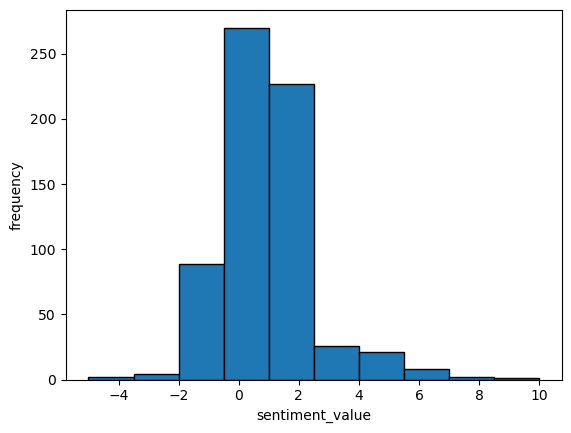

In [36]:
plt.hist(sent_df['sentiment_value'], edgecolor = "black", bins = 10)
plt.xlabel("sentiment_value")
plt.ylabel("frequency")
plt.show()

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

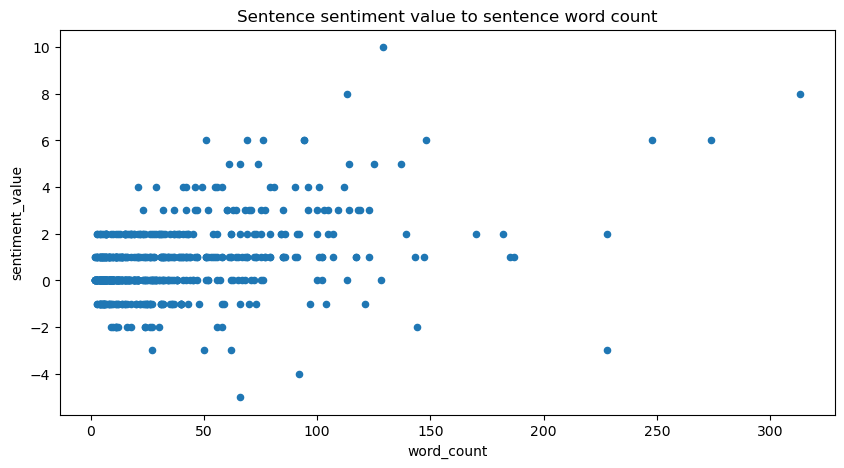

In [37]:
sent_df.plot.scatter(x='word_count',
                     y='sentiment_value',
                     figsize=(10,5),
                     title='Sentence sentiment value to sentence word count')

In [38]:
pw_txt = ' '.join(set(text_tokens).intersection(senti_pw.word))
ng_txt = ' '.join(set(text_tokens).intersection(senti_ng.word))


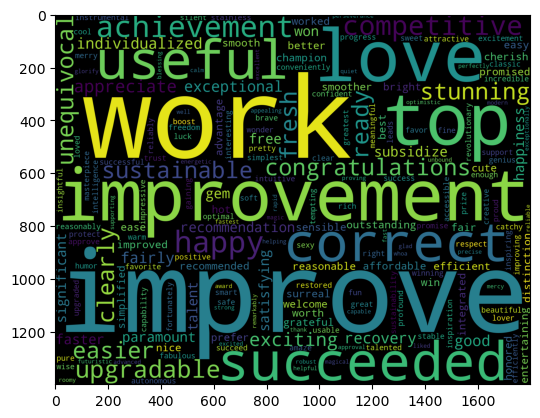

In [39]:
wordcloud_pw = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(pw_txt)
plt.imshow(wordcloud_pw)

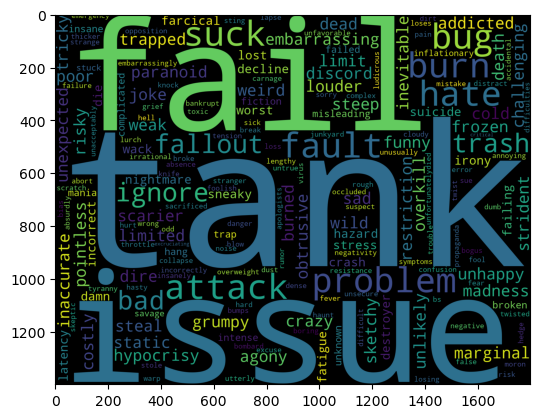

In [40]:
wordcloud_ng = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(ng_txt)
plt.imshow(wordcloud_ng)

# Conclusion: 
**Almost nutral sentiments with a slight inclination towards positive side**